In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from afinn import Afinn
import datetime
import matplotlib
% matplotlib inline

In [3]:
TW=pd.read_csv('tweets_file.csv',encoding = "ISO-8859-1")

In [4]:
TW.columns

Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

In [5]:
TW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 16 columns):
Unnamed: 0       14940 non-null int64
X                14940 non-null int64
text             14940 non-null object
favorited        14940 non-null bool
favoriteCount    14940 non-null int64
replyToSN        1102 non-null object
created          14940 non-null object
truncated        14940 non-null bool
replyToSID       886 non-null float64
id               14940 non-null float64
replyToUID       1102 non-null float64
statusSource     14940 non-null object
screenName       14940 non-null object
retweetCount     14940 non-null int64
isRetweet        14940 non-null bool
retweeted        14940 non-null bool
dtypes: bool(4), float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [6]:
temp=TW

In [7]:
def calculate_score(tweet):
    score=afinn.score(tweet)
    return score

In [8]:
#to store the afinn values of the tweets
scores=[]
afinn=Afinn()


In [9]:
#calculating afinn scores of tweets and storing in the scores list
for tweet in range(len(temp.text)):
    scores.append(calculate_score(temp.text[tweet]))

In [10]:
#creting list for positive and negative afinn scores
Pscore=Nscore=scores
#positive score indices and negative score indices
Pidx=[]
Nidx=[]

In [11]:
#calcualting 5 maximum afinn scores 
for i in range(0,5):
    idx=Pscore.index(np.max(Pscore))
    Pidx.append(idx)
    Pscore.remove(Pscore[idx]) #removing the indices to not repeat the same maximum valued indices
#calcualting 5 minumun afinn scores 
for i in range(0,5):
    idx=Nscore.index(np.max(Nscore))
    Nidx.append(idx)
    Nscore.remove(Nscore[idx]) #removing the indices to not repeat the same minumum valued indices
    

In [12]:
print(Pidx) #printing higest positive score indices
print(Nidx) #printing highest negative score indices

[6629, 7783, 13801, 2365, 12191]
[6541, 13596, 746, 916, 2263]


In [13]:
#storing the positive and negative afinn score's indices permanently.
Pstatic=Pidx
Nstatic=Nidx

In [14]:
TW.created[1]

'2016-11-23 18:40:29'

In [15]:
dto=[datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in temp.created]

In [16]:
dto

[datetime.datetime(2016, 11, 23, 18, 40, 30),
 datetime.datetime(2016, 11, 23, 18, 40, 29),
 datetime.datetime(2016, 11, 23, 18, 40, 3),
 datetime.datetime(2016, 11, 23, 18, 39, 59),
 datetime.datetime(2016, 11, 23, 18, 39, 39),
 datetime.datetime(2016, 11, 23, 18, 39, 11),
 datetime.datetime(2016, 11, 23, 18, 38, 53),
 datetime.datetime(2016, 11, 23, 18, 38, 20),
 datetime.datetime(2016, 11, 23, 18, 38, 9),
 datetime.datetime(2016, 11, 23, 18, 38),
 datetime.datetime(2016, 11, 23, 18, 37, 47),
 datetime.datetime(2016, 11, 23, 18, 37, 25),
 datetime.datetime(2016, 11, 23, 18, 37, 15),
 datetime.datetime(2016, 11, 23, 18, 36, 39),
 datetime.datetime(2016, 11, 23, 18, 36, 37),
 datetime.datetime(2016, 11, 23, 18, 35, 22),
 datetime.datetime(2016, 11, 23, 18, 35, 1),
 datetime.datetime(2016, 11, 23, 18, 34, 57),
 datetime.datetime(2016, 11, 23, 18, 34, 17),
 datetime.datetime(2016, 11, 23, 18, 34, 6),
 datetime.datetime(2016, 11, 23, 18, 34, 2),
 datetime.datetime(2016, 11, 23, 18, 33, 40

In [17]:
df = pd.DataFrame(dto, columns = ['date'])

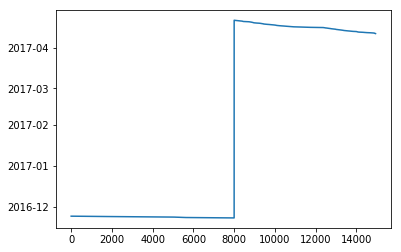

In [216]:
plt.plot(df)

In [18]:
dtt=pd.to_datetime(df['date'])

In [23]:
temp.created

0        2016-11-23 18:40:30
1        2016-11-23 18:40:29
2        2016-11-23 18:40:03
3        2016-11-23 18:39:59
4        2016-11-23 18:39:39
5        2016-11-23 18:39:11
6        2016-11-23 18:38:53
7        2016-11-23 18:38:20
8        2016-11-23 18:38:09
9        2016-11-23 18:38:00
10       2016-11-23 18:37:47
11       2016-11-23 18:37:25
12       2016-11-23 18:37:15
13       2016-11-23 18:36:39
14       2016-11-23 18:36:37
15       2016-11-23 18:35:22
16       2016-11-23 18:35:01
17       2016-11-23 18:34:57
18       2016-11-23 18:34:17
19       2016-11-23 18:34:06
20       2016-11-23 18:34:02
21       2016-11-23 18:33:40
22       2016-11-23 18:33:35
23       2016-11-23 18:33:28
24       2016-11-23 18:33:14
25       2016-11-23 18:33:03
26       2016-11-23 18:32:41
27       2016-11-23 18:32:13
28       2016-11-23 18:32:09
29       2016-11-23 18:31:54
                ...         
14910    2017-04-11 16:58:13
14911    2017-04-11 16:54:35
14912    2017-04-11 16:53:06
14913    2017-

In [40]:
sdates=[]  #list to store date stamp values of created column

In [53]:
for i in range(len(temp.created[:-10])):
    ex=datetime.datetime.strptime(temp.created[i],'%Y-%m-%d %H:%M:%S')
    sdates.append(ex)

In [55]:
ndates=[] #numerical equivalent of dates

In [56]:
for i in range(len(sdates)):
    nex= matplotlib.dates.date2num(sdates[i])
    ndates.append(nex)    

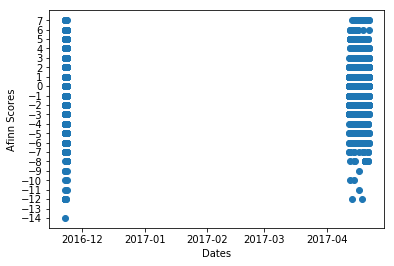

In [88]:
plt.plot_date(ndates,scores)
plt.xlabel('Dates')
plt.ylabel('Afinn Scores')
plt.yticks(list(range(-14,8)))
plt.show()

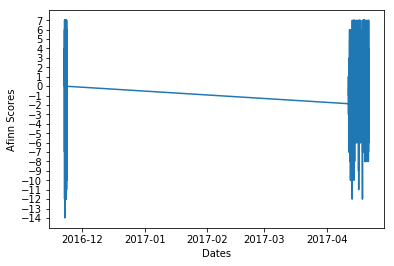

In [106]:
plt.plot(sdates,scores)
plt.xlabel('Dates')
plt.ylabel('Afinn Scores')
plt.yticks(list(range(-14,8)))
plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-104-dc0aa4a18c1f>, line 1)

In [99]:
datelist

[Timestamp('2018-11-07 09:50:01.722102', freq='D'),
 Timestamp('2018-11-08 09:50:01.722102', freq='D'),
 Timestamp('2018-11-09 09:50:01.722102', freq='D'),
 Timestamp('2018-11-10 09:50:01.722102', freq='D'),
 Timestamp('2018-11-11 09:50:01.722102', freq='D')]